<a href="https://colab.research.google.com/github/sumitarora92/Energy-Consumption/blob/Energy-Consumption/Energy_consumption(Steel_Industry_Dataset)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

Power saving stands for the ways and ideas through which it is possible to reduce the burden of delivering power at load end.
With proper power-saving techniques, Industries can save millions of dollars spent on wasted energy, and utility companies can meet their power demands and can save the same energy cost.

In this dataset, I will use mutilple linear regression to predict Industry Energy Consumption(in kWh).
Many things in the predictor variables like weekend vs weekdays, low load vs high load , leading vs lagging current reactive power etc will be the dominant factors for this prediction analysis.Using this model, any energy industry can reduce their unnecessary energy consumption and increase their business revunues. 

### Data Set Information:

https://archive.ics.uci.edu/ml//datasets/Steel+Industry+Energy+Consumption+Dataset

The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea. It produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

# Attribute Information:

Date Continuous-time data taken on the first of the month

Usage_kWh Industry Energy Consumption Continuous kWh

Lagging Current reactive power Continuous kVarh

Leading Current reactive power Continuous kVarh

CO2 Continuous ppm

NSM Number of Seconds from midnight Continuous S

Week status Categorical (Weekend (0) or a Weekday(1))

Day of week Categorical Sunday, Monday : Saturday

Load Type Categorical Light Load, Medium Load, Maximum Load

# Importing necessary libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

# Reading the Data

In [ ]:
df=pd.read_csv('Steel_industry_data.csv')
df.head(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1/1/2018 0:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,1/1/2018 0:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,1/1/2018 0:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,1/1/2018 1:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,1/1/2018 1:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,1/1/2018 1:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,1/1/2018 1:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,1/1/2018 2:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,1/1/2018 2:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,1/1/2018 2:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [ ]:
df.tail(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35030,31/12/2018 21:45,3.42,0.00,13.36,0.0,100.00,24.80,78300,Weekday,Monday,Light_Load
35031,31/12/2018 22:00,3.42,0.00,13.07,0.0,100.00,25.31,79200,Weekday,Monday,Light_Load
35032,31/12/2018 22:15,3.24,3.38,0.22,0.0,69.20,99.77,80100,Weekday,Monday,Light_Load
35033,31/12/2018 22:30,3.67,4.43,0.00,0.0,63.80,100.00,81000,Weekday,Monday,Light_Load
35034,31/12/2018 22:45,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday,Light_Load
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [ ]:
df.shape

(35040, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
#rename attribute
df = df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh', 
                          'CO2(tCO2)' : 'CO2'})

In [ ]:
df.corr()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


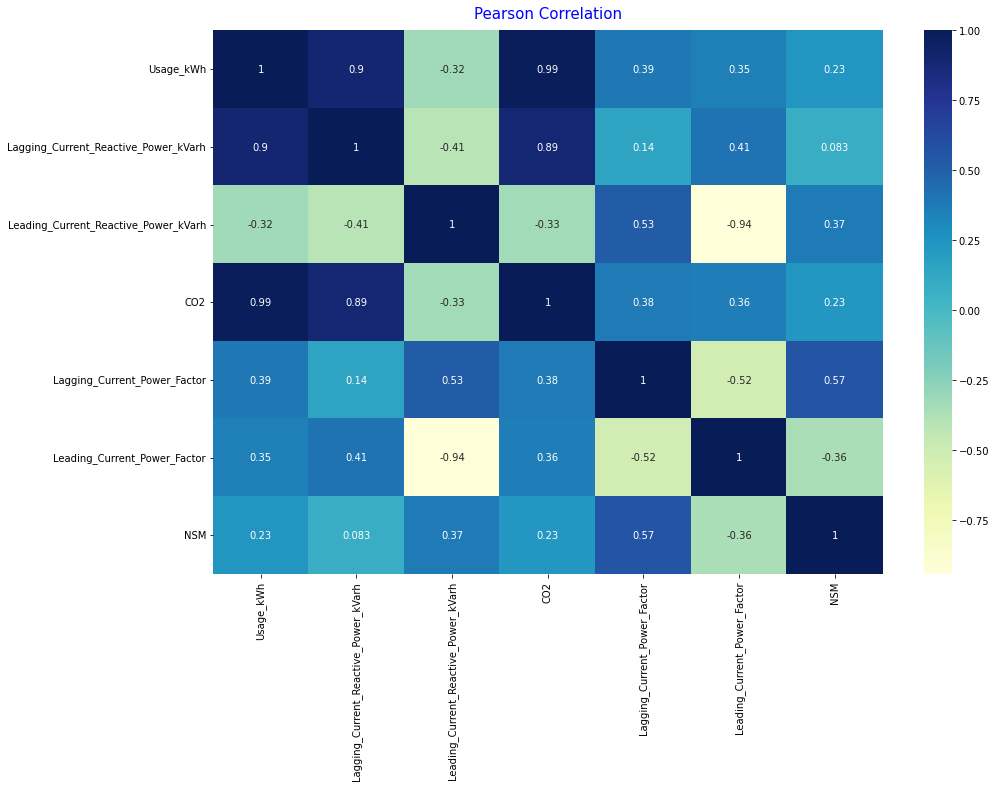

In [ ]:
#visualize the correlation using pearson correlation
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

In [ ]:
#analyze the most energy consumption based on time
most_energy_consumption = pd.pivot_table(df, index = 'date', values = 'Usage_kWh', aggfunc = {'Usage_kWh' : np.max})
most_energy_consumption.head(10)

,Usage_kWh
date,
1/1/2018 0:00,3.42
1/1/2018 0:15,3.17
1/1/2018 0:30,4.00
1/1/2018 0:45,3.24
1/1/2018 10:00,3.64
1/1/2018 10:15,4.07
1/1/2018 10:30,3.71
1/1/2018 10:45,3.60
1/1/2018 11:00,4.21


In [ ]:
most_energy_consumption.tail(10)

,Usage_kWh
date,
9/9/2018 7:30,2.92
9/9/2018 7:45,3.06
9/9/2018 8:00,3.06
9/9/2018 8:15,3.74
9/9/2018 8:30,5.76
9/9/2018 8:45,8.53
9/9/2018 9:00,10.55
9/9/2018 9:15,10.22
9/9/2018 9:30,10.98


In [ ]:
most_energy_consumption.shape

(35040, 1)

In [ ]:
most_energy_consumption = pd.pivot_table(df, index = 'date', values = 'Usage_kWh', aggfunc = {'Usage_kWh' : np.mean})
most_energy_consumption.head(60)

,Usage_kWh
date,
1/1/2018 0:00,3.42
1/1/2018 0:15,3.17
1/1/2018 0:30,4.00
1/1/2018 0:45,3.24
1/1/2018 10:00,3.64
1/1/2018 10:15,4.07
1/1/2018 10:30,3.71
1/1/2018 10:45,3.60
1/1/2018 11:00,4.21


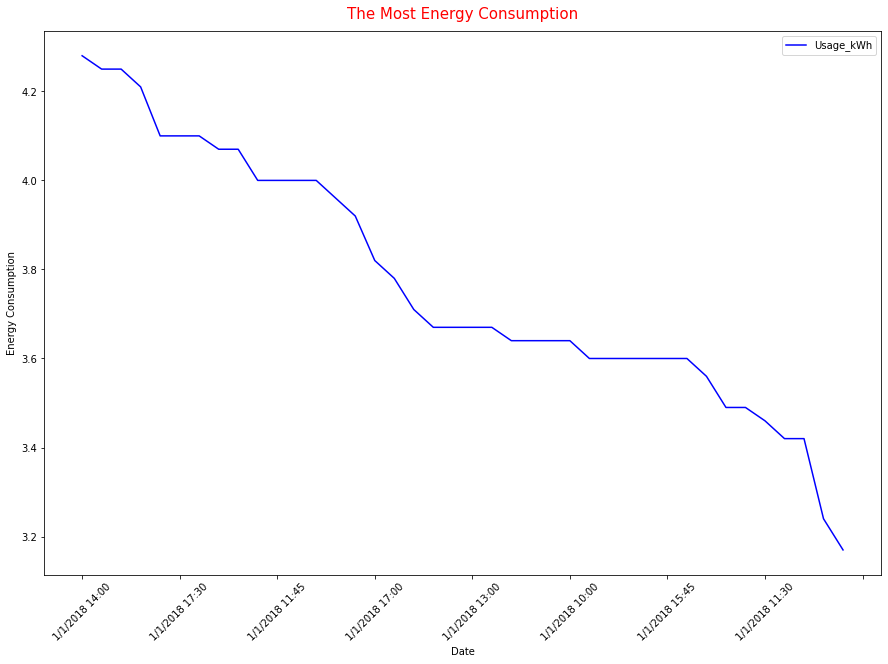

In [ ]:
#visualize the most energy consumption on time
chart = most_energy_consumption[:40].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line', color = 'blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, color = 'red', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

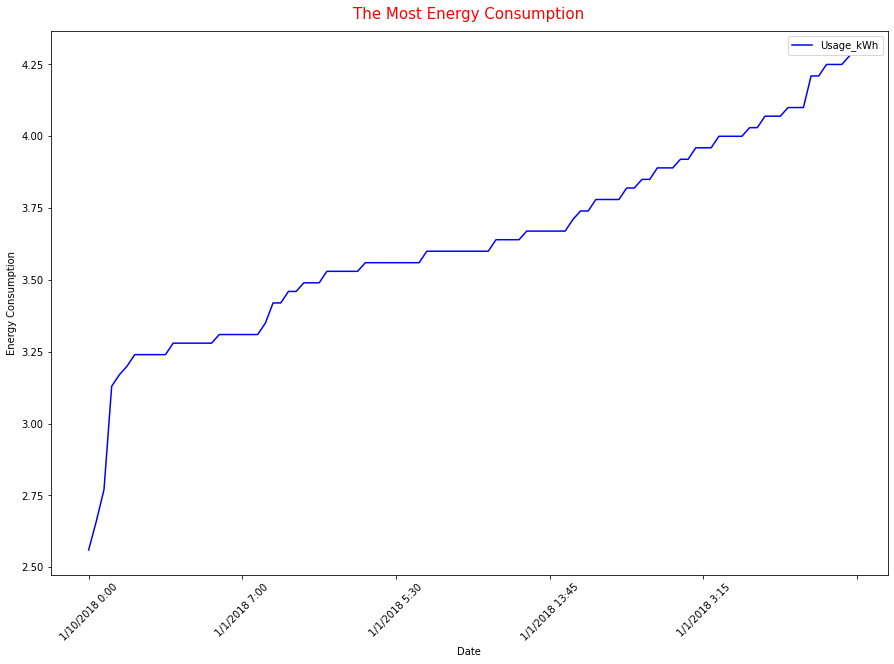

In [ ]:
#visualize the most energy consumption on time
chart = most_energy_consumption[:100].sort_values(by = 'Usage_kWh').plot(kind = 'line', color = 'blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('The Most Energy Consumption', fontsize = 15, color = 'red', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

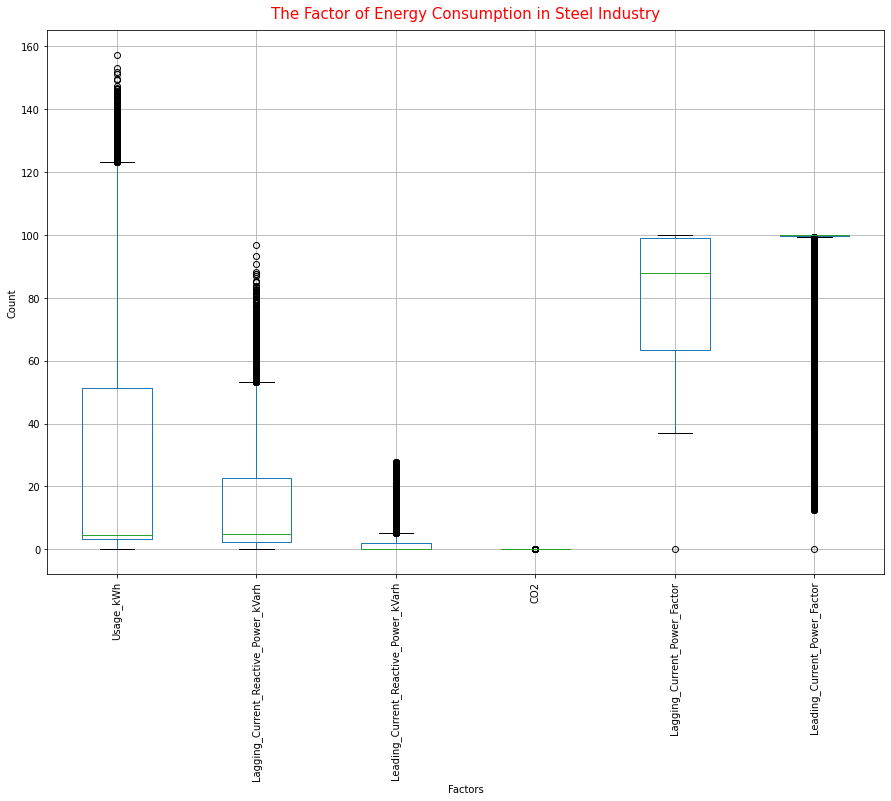

In [ ]:
#analyze the factor of energy consumption
chart = df.boxplot(column = ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'r', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

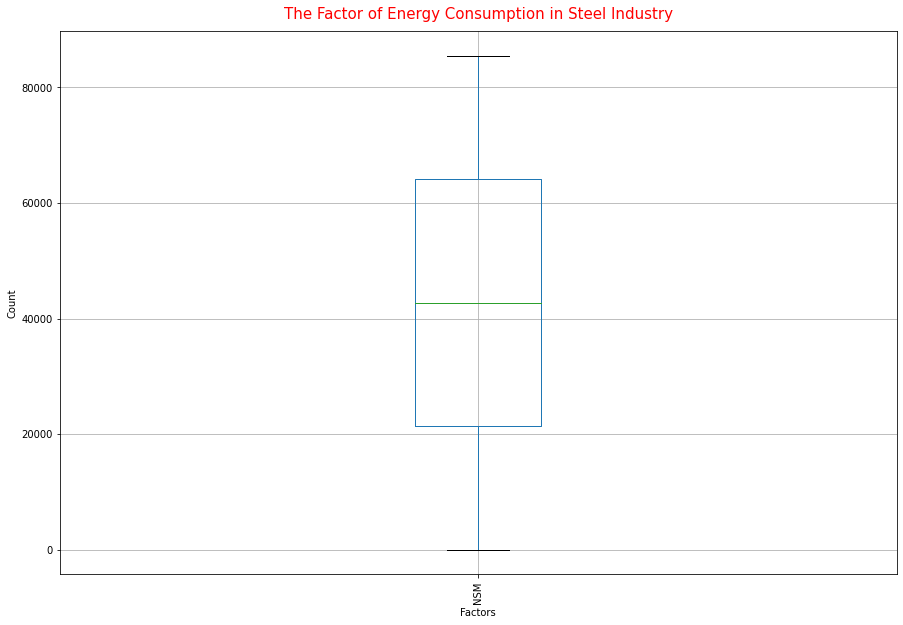

In [ ]:
#analyze the factor of energy consumption
chart = df.boxplot(column = ['NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'r', pad = 12)
plt.xlabel('Factors')
plt.ylabel('Count')
plt.show()

In [ ]:
#analyze of energy consumption and NSM based on load type, day of week and week status
pd.pivot_table(df, index = ['Load_Type', 'Day_of_week', 'WeekStatus'], values = ['NSM', 'Usage_kWh'], 
               aggfunc = {'NSM' : np.mean, 'Usage_kWh' : np.mean})

NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Medium_Load  Friday      Weekday     61758.000000  42.220494
             Monday      Weekday     61758.000000  43.097231
             Saturday    Weekend     62218.421053  17.547648
             Sunday      Weekend     61967.647059  16.368934
             Thursday    Weekday     61758.000000  44.986200
             Tuesday     Weekday     61705.102041  45.020797
             Wednesday   Weekday     61705.102041  40.462379

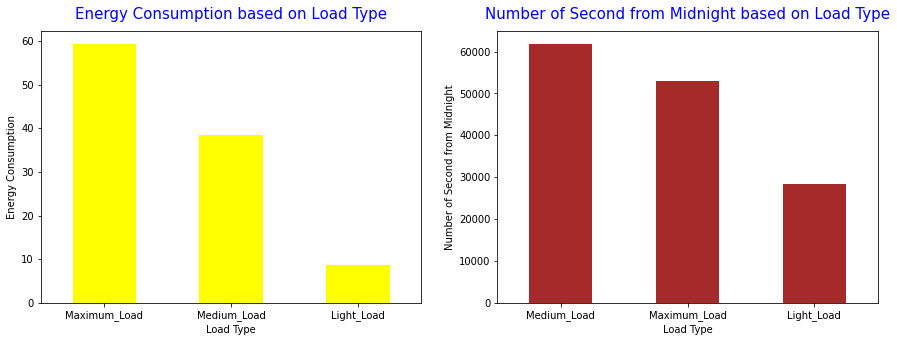

In [ ]:
#visualize energy consumption based on load type
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = df.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'yellow')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

#visualize number of second from midnight based on load type
plt.subplot(1, 2, 2)
chart = df.groupby('Load_Type')['NSM'].mean().sort_values(ascending = False).plot(kind = 'bar', color = 'brown')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()

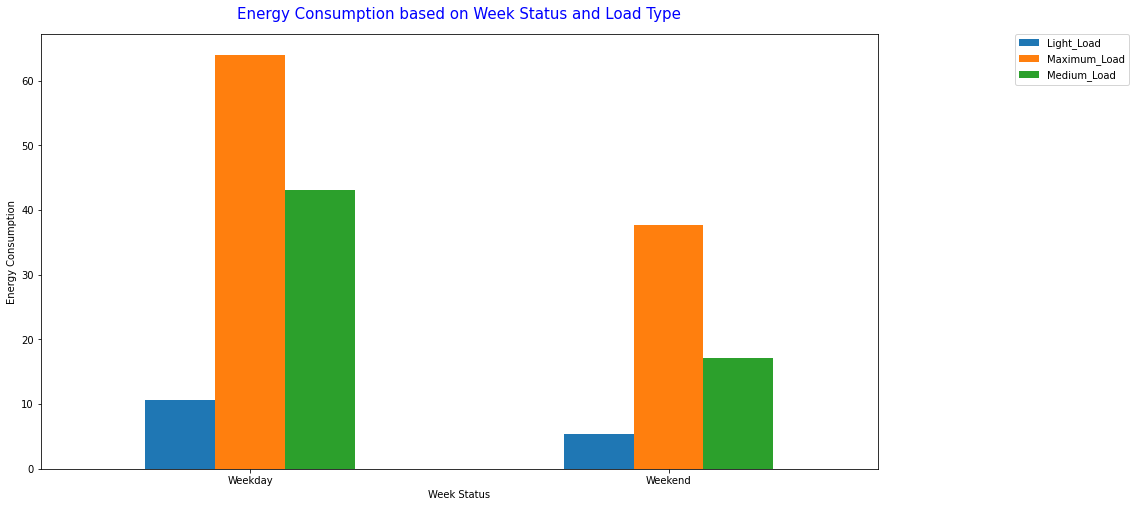

In [ ]:
#visualize energy consumption based on week status and load type
plt.rcParams['figure.figsize'] = (15,8)
chart = df.groupby(['WeekStatus','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumption based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

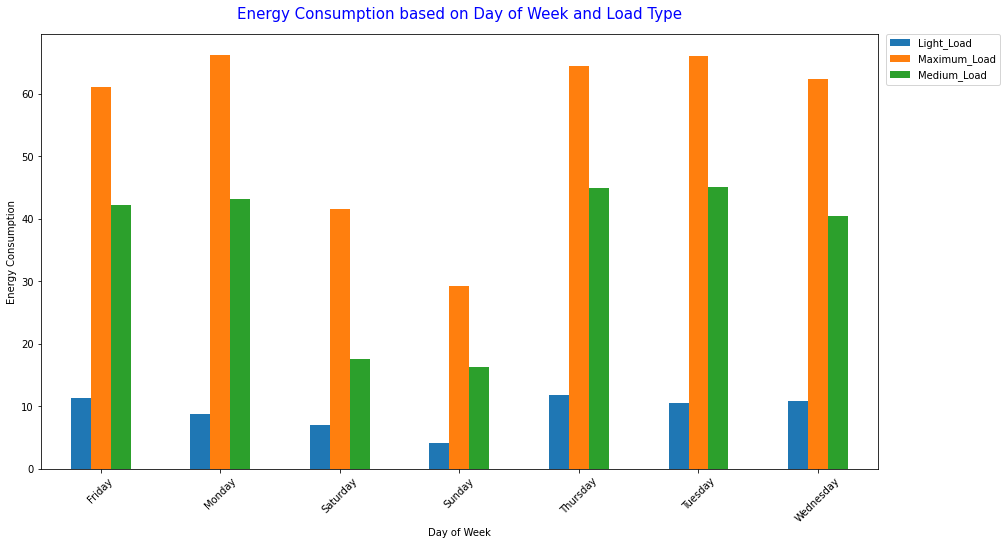

In [ ]:
#visualize energy consumption based on day of week and load type
chart = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption based on Day of Week and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

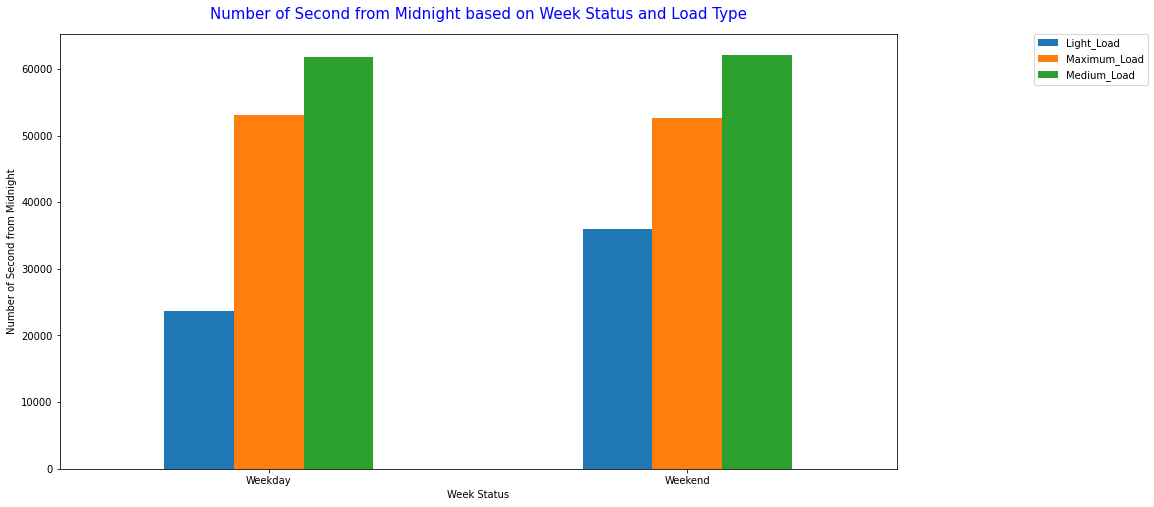

In [ ]:
#visualize number of second from midnight based on week status and load type
chart = df.groupby(['WeekStatus','Load_Type'])['NSM'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Number of Second from Midnight based on Week Status and Load Type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Week Status')
plt.ylabel('Number of Second from Midnight')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

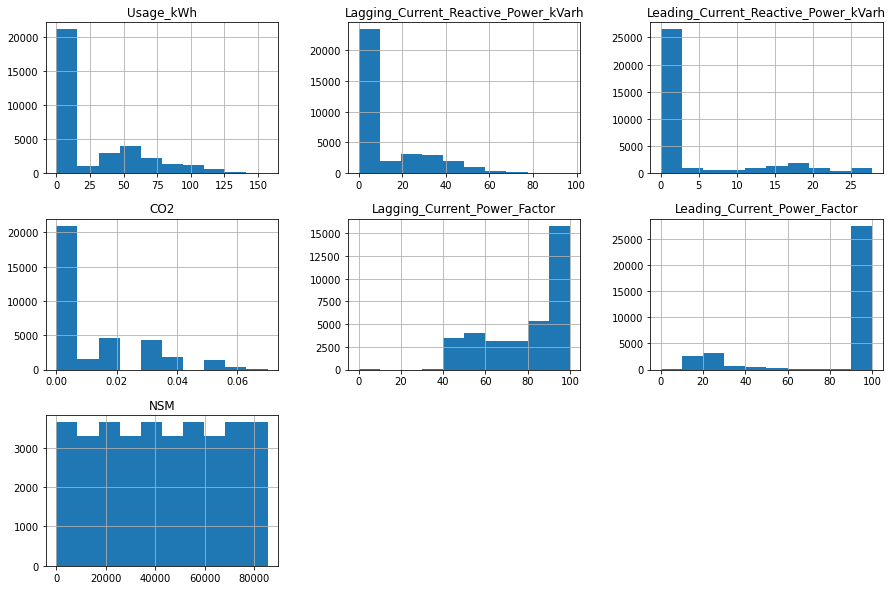

In [ ]:
#distribution of each variable
df.hist(figsize = (15,10))
plt.show()

# Converting Categorical Data to Numerical one by one hot encoding

In [ ]:
#indexing date
df = df.set_index('date')

#handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
1/1/2018 0:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1/1/2018 0:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
1/1/2018 0:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
1/1/2018 1:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
1/1/2018 1:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [ ]:
df.shape

(35040, 16)

# Spliting the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

In [ ]:
#split data
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28032, 15)
(28032,)
(7008, 15)
(7008,)


# Linear Regression Model

In [ ]:
#Linear Regression Model
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 14 ms, sys: 2.91 ms, total: 16.9 ms
Wall time: 17.2 ms


0.9843037490428145

In [ ]:
#prediction
y_pred1 = lr.predict(X_test)
print(y_pred1)

[  3.08355761  69.96744424 124.51777315 ... 147.88174485   5.03881066
  40.91550508]


### Checking MAE, MSE, RMSE

In [ ]:
#check MAE, MSE and RMSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error :  2.5337743872351255
Mean Squared Error :  17.842279082767295
Root Mean Squared Error :  4.22401220201449


# Ridge(L2 regularization) Linear Regression Model

In [ ]:
#Ridge Regression Model
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

CPU times: user 9.61 ms, sys: 9.21 ms, total: 18.8 ms
Wall time: 10.8 ms


0.9706956657502628

In [ ]:
#prediction
y_pred2= ridge.predict(X_test)
print(y_pred2)

[  3.31380263  75.6505504  117.49306695 ... 143.87313311   8.87362384
  36.36636479]


### Checking MAE, MSE, RMSE

In [ ]:
#check MAE, MSE and RMSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error :  3.9739874323321485
Mean Squared Error :  33.3108913360711
Root Mean Squared Error :  5.771558830686135


# Lasso(L1 regularization) Linear Regression Model

In [ ]:
#Lasso Regression Model
lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

CPU times: user 51.3 ms, sys: 50.6 ms, total: 102 ms
Wall time: 56.7 ms


0.9101246959181544

In [ ]:
#prediction
y_pred3 = lasso.predict(X_test)
print(y_pred3)

[  3.1468315   82.22481351 107.05521035 ... 138.25602813  16.89498038
  27.72982569]


### Checking MAE, MSE, RMSE

In [ ]:
#check MAE, MSE and MSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error :  6.992496595596172
Mean Squared Error :  102.16326576651537
Root Mean Squared Error :  10.107584566379614


# Comparison of all the models and their MAE,MSE and RMSE

In [ ]:
table=pd.DataFrame({
        "Model":['Linear Regression','Ridge Regression','Lasso Regression'],
        "MAE":[2.55,4.13,6.95],
        "MSE":[17.77,35.51,101.54],
        "RMSE":[4.22,5.96,10.06]
})
table

,Model,MAE,MSE,RMSE
0,Linear Regression,2.55,17.77,4.22
1,Ridge Regression,4.13,35.51,5.96
2,Lasso Regression,6.95,101.54,10.06


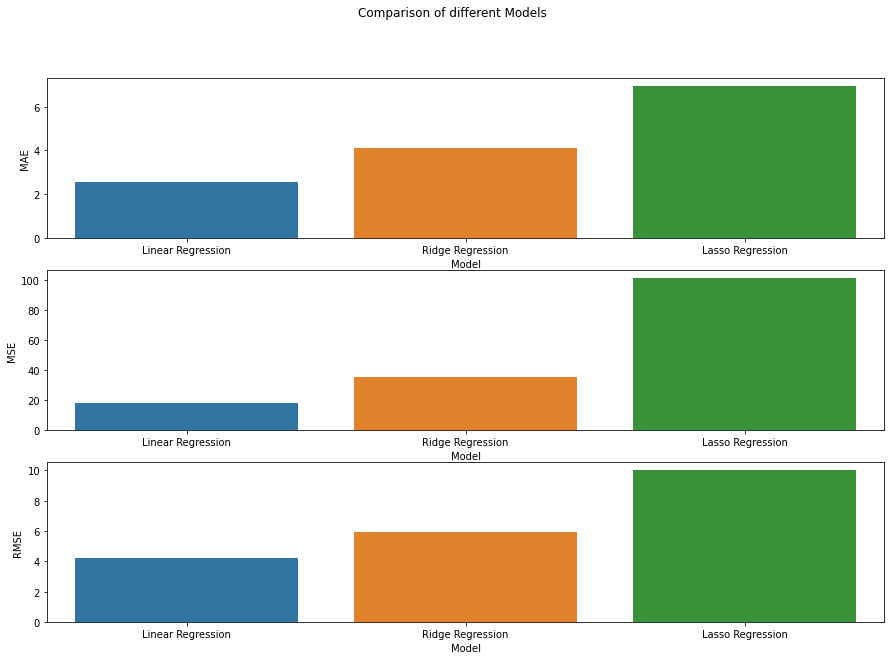

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

fig.suptitle('Comparison of different Models')

sns.barplot(ax=axes[0], data=table, x='Model', y='MAE')
sns.barplot(ax=axes[1], data=table, x='Model', y='MSE')
sns.barplot(ax=axes[2], data=table, x='Model', y='RMSE')

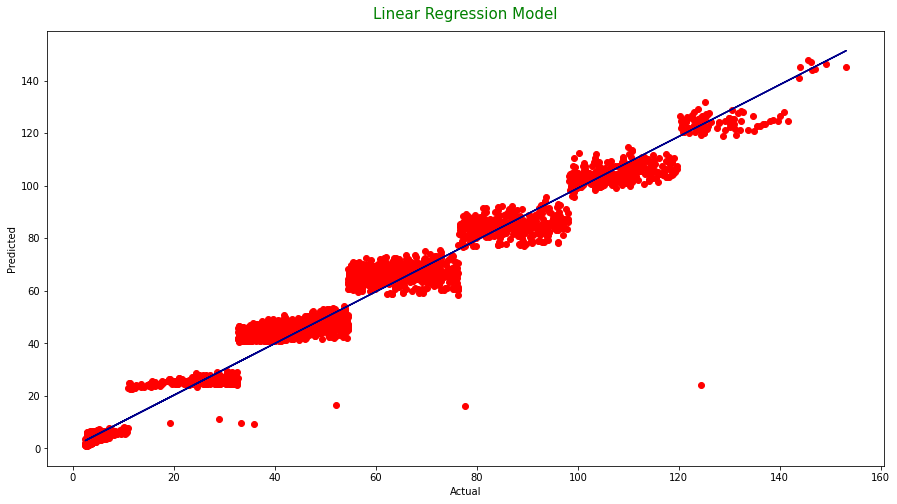

In [ ]:
#visualize model
x = y_test
y = y_pred1

plt.title('Linear Regression Model', fontsize = 15, color = 'g', pad = 12)
plt.plot(x, y,'o', color = 'r')

m, b = np.polyfit(x, y, 1) # 1= Degree of the fitting polynomial
plt.plot(x, m * x + b, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
y_test.describe()

count    7008.000000
mean       27.790164
std        33.717719
min         2.450000
25%         3.200000
50%         4.570000
75%        52.107500
max       153.140000
Name: Usage_kWh, dtype: float64

# Conculsion

### Linear Regression is the best model in terms of MAE, MSE, RMSE